# Words impact

In this notebook, we are going to observe the impact of words on reactions & comments number. 

We will focus essentially on Simon Sinek's posts. 

## Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Content analysis

In this section, let's analyze the content of each author.  
We can perform some analysis :
* which words are correlated with a high attractivity ?
* sentiment analysis
* topic modeling

### Word's attractivity

Let's see if there are specific words that are associated with the number of reactions and comments.  
We pick Simon Sinek's content only.  
Therefore it allows us to analyse content without bias. 

In [3]:
#We need a Document Term Matrix
#Let's take the one we created about Simon Sinek
df = pd.read_pickle("sinekDtm.pkl")
df.head(2)

,#Reactions,#Comments,Content,ability,abitofoptimism,able,abnormal,absolutely,accept,accepting,...,years,yesterday,yin,york,youll,youre,youtube,youtubecomsimonsinek,youve,única
0,12093,257,we are only in charge when we are willing to l...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5415,164,when the people have to manage dangers from in...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(245, 1533)

In [5]:
df.dtypes

#Reactions               int64
#Comments                int64
Content                 object
ability                  int64
abitofoptimism           int64
                         ...  
youre                    int64
youtube                  int64
youtubecomsimonsinek     int64
youve                    int64
única                    int64
Length: 1533, dtype: object

We note 245 posts from Simon Sinek, and 1530 different words.

Now, to observe which words have the most influence on Reactions & Comments, we are going to process as the following : 
* If a word is present in a post, it took as value the number of Reactions & Comments associated with this post
* We count in how many posts each word is present (if a word appears several times in a post, it's counted as 1)
* For each word, we calculate the mean
* We classify these words

In [6]:
#We use arrays to make it happen

#First we extract words from the dataframe into a new dataframe
wordsDf = df.iloc[:,3:]

#Then we change values inside the df {1 if >0 else 0)
#To do so we use "replace" module
#We need the maximal value present in the df 
print(wordsDf.nunique().max()) #Get the maximal value in the df (a word appears 6 times in a post)
wordsDfTransformed = wordsDf.replace(to_replace=[1,2,3,4,5,6],value=1) #We replace every value different from 0 into 1

#Then we transform this dataframe into an array
wordsArray = np.array(wordsDfTransformed)

#We do the same with #Reactions column 
reactionsArray = np.array(df['#Reactions'])

# We associate each word present in a post with the number of Reactions
wordsArrayReactions = np.empty(wordsArray.shape) #Initialize our final array

for i in range(len(reactionsArray)):
    wordsArrayReactions[i,:] = reactionsArray[i] * wordsArray[i,:]

#Finally, we transform this array into a dataframe 
wordsReactionsDf = pd.DataFrame(data=wordsArrayReactions,columns=wordsDf.columns)

6


In [7]:
#Let's do the same for Comments
commentsArray = np.array(df['#Comments'])
wordsArrayComments = np.empty(wordsArray.shape)

for i in range(len(commentsArray)):
    wordsArrayComments[i,:] = commentsArray[i] * wordsArray[i,:]

wordsCommentsDf = pd.DataFrame(data=wordsArrayComments,columns=wordsDf.columns)

In [8]:
#Now we can estimate the influence of each word on the number of reactions & comments
wordsImpact = pd.DataFrame(index=wordsDf.columns,columns=['Reactions','Comments']) #The df is initialized

#We calculate the reactions & comments mean for each word, ignoring when the word is not in the post

wordsImpact['Reactions'] = np.sum(wordsReactionsDf,axis=0) / np.count_nonzero(wordsReactionsDf,axis=0)
wordsImpact['Comments'] = np.sum(wordsCommentsDf,axis=0) / np.count_nonzero(wordsCommentsDf,axis=0)

wordsImpact

,Reactions,Comments
ability,15046.500000,291.000000
abitofoptimism,19013.000000,410.000000
able,9548.750000,223.250000
abnormal,979.000000,37.000000
absolutely,12513.000000,408.666667
...,...,...
youre,815.500000,26.500000
youtube,3538.071429,107.928571
youtubecomsimonsinek,1226.428571,55.000000
youve,1614.000000,35.000000


### Wordclouds

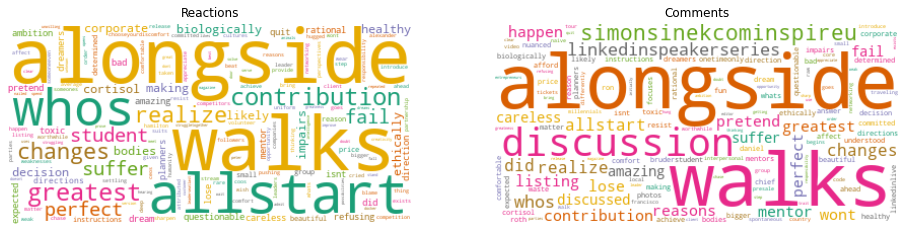

In [32]:
#Let's create wordcloud
from wordcloud import WordCloud

#Initialisation
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

#Reset the output dimension
plt.rcParams['figure.figsize'] = [16, 6]

#Generate wordclouds
#Here we have created a Dataframe drawing the impact of each word on reactions & comments number
#Basically, a method of wordcloud.Wordcloud consists in generating the frequency of apparation of a word in a text : wc.generate(text)
#Instead, we want to plot a wc using our own frequency : reactions & comments number
#Therefore we use the method wc.generate_from_frequencies(dict{words:frequencies})
for index, type in enumerate(wordsImpact.columns):
    wc.generate_from_frequencies(wordsImpact.to_dict().get(type)) #to_dict transform a dataframe into a dict {"Reactions":{words:frequency},"Comments":{words:frequency}}

    plt.subplot(1,2,index+1)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    plt.title(wordsImpact.columns[index])

plt.show()

In [54]:
#Let's see in the Document-Term Matrix for the most important words
#Words we will study are "alongside", "walks","allstart","discussion"

wordsToCheck =["alongside", "walks","allstart","discussion"]

pd.set_option('display.max_colwidth', None)

for words in wordsToCheck:
    print(words)
    print("#Reactions : ", tuple(df[df[words]>0]['#Reactions']))
    print("#Comments : ", tuple(df.loc[df[words]>0]['#Comments']))
    print("Content : ", tuple(df.loc[df[words]>0]['Content']))
    print("-------------")

alongside
#Reactions :  (103061,)
#Comments :  (2637,)
Content :  ('a mentor is not someone who walks ahead of us to show us how they did it a mentor walks alongside us to show us what we can do',)
-------------
walks
#Reactions :  (103061,)
#Comments :  (2637,)
Content :  ('a mentor is not someone who walks ahead of us to show us how they did it a mentor walks alongside us to show us what we can do',)
-------------
allstart
#Reactions :  (86442,)
#Comments :  (1505,)
Content :  ('dream big start small but most of allstart',)
-------------
discussion
#Reactions :  (2952,)
#Comments :  (2363,)
Content :  ('join simon for a onetimeonly discussion about together is better on friday august    et send your questions to  bookclubsimonsinekcom ',)
-------------


## Conclusion

From these wordclouds, we doesn't spot any insight which allows us to make observations.  
It seems words that have the more reactions or comments appears only one time.  

We can safely say that our approach wasn't the best. 